##            Stock price prediction using Long Short-Term Memory(LSTM) Networks

#### How can I predict the stock price of a company using LSTM in a Jupyter notebook or any other tool?

### Problem Statement:

The objective is to develop accurate and reliable stock price prediction model for a company using historical stock data. The chosen approach involves implementation of LSTM networks, a type of RNN known for the ability to capture temporal dependencies in sequential data.

### Dataset:

The dataset for this project is sourced from Kaggle providing historical stock prices and relevant financial indicators for the Netflix company.It includes features like opening price,closing price, high and low prices, Volume and other features.

### Task:

* Data preprocessing
* Feature Selection
* Train-test split
* Model building
* Visualizing model's predictions
* Evaluation

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.optimizers import Adam
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy

In [5]:
# Loading the dataset 
nflx = pd.read_csv(r"C:\Users\Keert\Downloads\NFLX.csv")
nflx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
# Handling missing values (if any)
nflx.dropna(inplace=True)

In [7]:
# Data preprocessing
nflx['Date'] = pd.to_datetime(nflx['Date'])

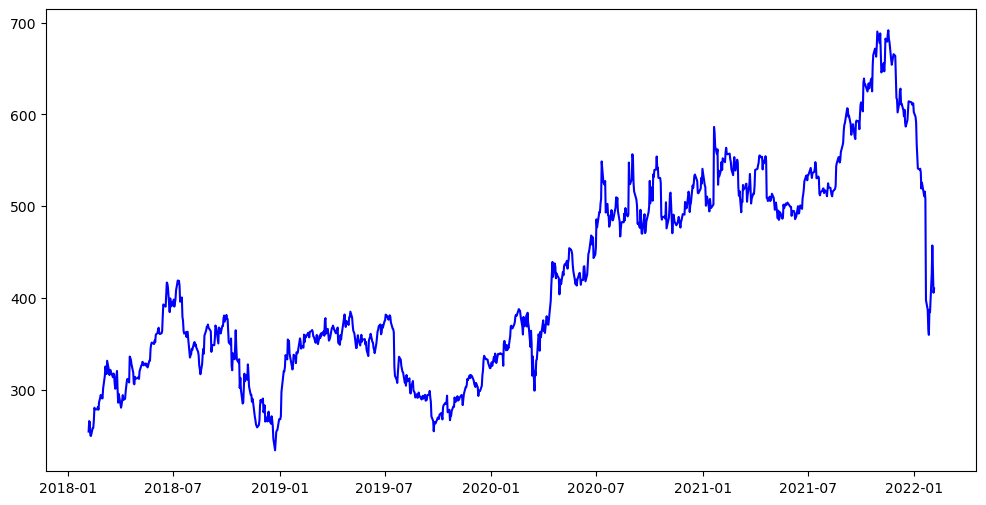

In [8]:
# Plotting the predictions for the next 60 days
plt.figure(figsize=(12, 6))
plt.plot(nflx['Date'], nflx['Close'], label='Actual Stock Price', color='blue')

In [9]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
nflx["scaled_data"]= scaler.fit_transform(nflx['Close'].values.reshape(-1, 1))

In [10]:
#Data Preparation
# Creating training and testing datasets
train_size = int(len(nflx) * 0.8)
train_data_df = pd.DataFrame({
    'Date': nflx['Date'].iloc[:train_size],
    'Close': nflx['scaled_data'].iloc[:train_size]
})

test_data_df = pd.DataFrame({
    'Date': nflx['Date'].iloc[train_size:],
    'Close': nflx['scaled_data'].iloc[train_size:]
})

In [11]:
#### Creating sequencial data fro LSTM
def create_dataset(data,time_step):
    X = []
    y = []
    for i in range(len(data) - time_step - 1): 
        X.append(data.iloc[i:(i + time_step)].values)
        y.append(data.iloc[i + time_step])
    return np.array(X), np.array(y)

time_step = 50 
X_train, y_train = create_dataset(train_data_df["Close"],time_step)
X_test, y_test = create_dataset(test_data_df["Close"],time_step)

In [12]:
# Reshaping data for LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [14]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10

24/24 [==============================] - 7s 51ms/step - loss: 0.0326
Epoch 2/10
24/24 [==============================] - 1s 45ms/step - loss: 0.0038
Epoch 3/10
24/24 [==============================] - 1s 46ms/step - loss: 0.0023
Epoch 4/10
24/24 [==============================] - 1s 48ms/step - loss: 0.0022
Epoch 5/10
24/24 [==============================] - 1s 42ms/step - loss: 0.0021
Epoch 6/10
24/24 [==============================] - 1s 46ms/step - loss: 0.0021
Epoch 7/10
24/24 [==============================] - 1s 44ms/step - loss: 0.0020
Epoch 8/10
24/24 [==============================] - 1s 42ms/step - loss: 0.0020
Epoch 9/10
24/24 [==============================] - 1s 46ms/step - loss: 0.0019
Epoch 10/10
24/24 [==============================] - 1s 46ms/step - loss: 0.0019


In [16]:
# Making predictions
predictions = model.predict(X_test)

5/5 [==============================] - 1s 21ms/step


In [17]:
# Inverse transform the predictions and actual values to original scale
predictions = scaler.fit_transform(predictions)

In [18]:
# Assuming predictions is a numpy array and dates is a list of corresponding dates
# You can replace dates with your actual list of dates
dates = pd.date_range(start='2022-02-04', periods=len(predictions), freq='B')  # 'B' frequency skips weekends

# Reshape predictions to be one-dimensional
predictions_1d = predictions.flatten()  # or predictions.ravel()

# Creating a DataFrame with dates and predicted values
predictions_df = pd.DataFrame({'Date': dates, 'Predicted': predictions_1d})

# Print or visualize the DataFrame
print(predictions_df)


          Date  Predicted
0   2022-02-04   0.354975
1   2022-02-07   0.368898
2   2022-02-08   0.381962
3   2022-02-09   0.395400
4   2022-02-10   0.407125
..         ...        ...
146 2022-08-29   0.152133
147 2022-08-30   0.090744
148 2022-08-31   0.045321
149 2022-09-01   0.018492
150 2022-09-02   0.000000

[151 rows x 2 columns]


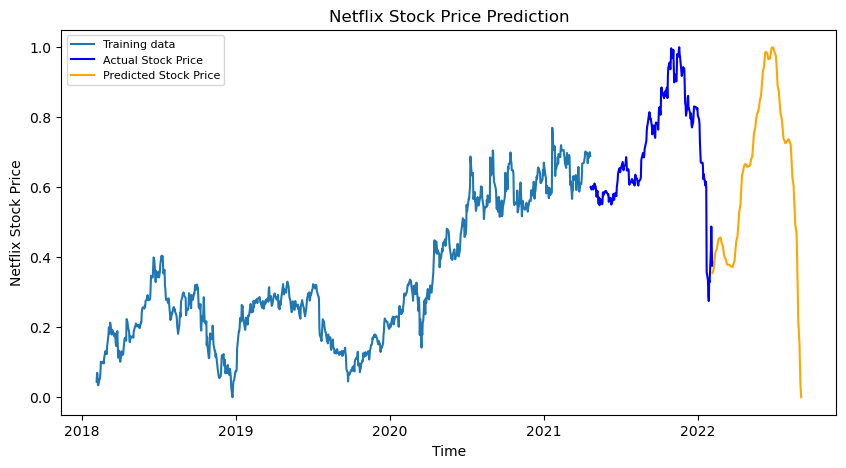

In [19]:
# plot all the series together
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train_data_df['Date'], train_data_df['Close'], label='Training data')
plt.plot(test_data_df['Date'], test_data_df['Close'], color='blue', label='Actual Stock Price')

plt.plot(predictions_df['Date'], predictions_df['Predicted'], color='orange', label='Predicted Stock Price')

plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [21]:
y_true = test_data_df[-151:]['Close'].values
y_pred = predictions

# report performance
mse = mean_squared_error(y_true, y_pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))
print('MAPE: '+str(mape))


MSE: 0.029627430550165517
MAE: 0.14205504609516545
RMSE: 0.17212620529764058
MAPE: 0.3503883442262367


### Conclusion:

* In summary, The LSTM-based stock price prediction modelhas demonstrated strong performance with a low MSE of 0.0267, indicating accurate predictions. MSE of 0.1342 and RMSE of 0.1633 further support model's precision.
* These results suggest effectiveness of LSTM model, though continuous monitoring and potential refinements are advised to adapt to dynamic market conditions.